L'idea è che vogliamo prendere confidenza con il framework di pytorch, e pertanto inizieremp con la parte un pò più semplice che è quella dei modelli già visti, ma che non c'entrano nienete, o c'entrano in minima parte con le reti neurali. Inizieremo con Linear regression.

link alla libreria di pytorch: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [68]:
#Hyperparameters:
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001



In [69]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],      #sono 15 samples con una sola feature
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],   #Sono le 15 etichette.
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [70]:
#Linear Regression model:
#Lo erediatiamo direttamente dal modello di pytorch, iinvocando la classe Linear. Non dobbiamo creane una come abbiamo fatto in altri scripts.

model = nn.Linear(input_size, output_size) #Abbiamo una feature e un solo output.

'''
Questo di fatto è il layer linear che di solito si implementa in una rete neurale. Il fatto che non sia in una nn e il fatto che non abbia una funzione di attivazione 
lo rende semplicemente W.t * x + b. 
'''



'\nQuesto di fatto è il layer linear che di solito si implementa in una rete neurale. Il fatto che non sia in una nn e il fatto che non abbia una funzione di attivazione \nlo rende semplicemente W.t * x + b. \n'

Una piccola accortezza, il numero di features da instanziare e il numero di output da instanziare serve al modello a capire quanti parametri sono presenti nel modello. Ricordati che come visto negli scripts precedenti, l'oggetto optimizer richiede come argomento dei parametri, che noi forniamo così: model.parameters()

In [71]:
#Loss and optimization:

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #Si fa perchè altrimenti devo fare inversione della matrice dei parametri.



Aquesto punto inizio il LOOP di addestramento del modello. In questo caso molto semplice non si usa il loop sulle batches, perchè ho molti pochi ccampioni. Efffettuo direttamente il loop sulle epoche. Ogni volta li processo tutti insieme i dati.

In [72]:
#Train Loop:

for epoch in range(num_epochs):
    
    # Convert numpy arrays to torch tensors, ricorda numpy non compatibile con framework pytorch
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass:
    outputs = model.forward(inputs) #il nostro modello è una semplice linear regression.
    loss = criterion(outputs, targets)

    #bacckward pass:
    optimizer.zero_grad()
    loss.backward() #calcolo delle derivate
    optimizer.step() #utilizzo dei gradienti per aggiornare i pesi

    if (epoch + 1) % 5 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))



Epoch [5/60], Loss: 18.1893
Epoch [10/60], Loss: 7.4901
Epoch [15/60], Loss: 3.1557
Epoch [20/60], Loss: 1.3997
Epoch [25/60], Loss: 0.6882
Epoch [30/60], Loss: 0.3999
Epoch [35/60], Loss: 0.2831
Epoch [40/60], Loss: 0.2357
Epoch [45/60], Loss: 0.2165
Epoch [50/60], Loss: 0.2086
Epoch [55/60], Loss: 0.2054
Epoch [60/60], Loss: 0.2040


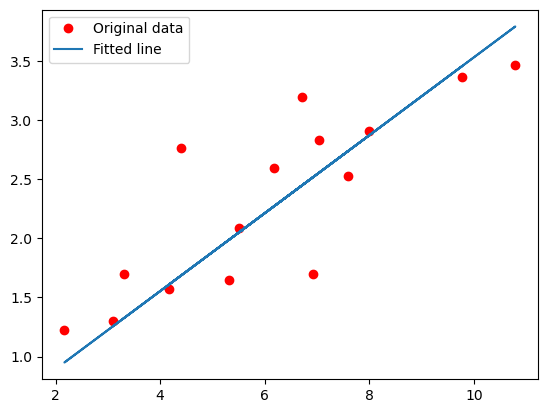

In [73]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

ATTENZIONE: E' POSSIBILE SALVARE IL MODELLO NEL SUO INSIEME, QUINDI GIA' OTTIMIZZATO.

In [74]:
torch.save(model.state_dict(),'model.ckpt')

Durante l'addestramento di modelli molto grandi, è importante fare di volta iin volta qualche checkpoint, perchè se per qualche motivo l'addestramento si dovesse interrompere, allora io posso far ripartire l'addestramento da quel punto. 

Di solito si effettua un checkpoint alla fine di ogni epoca.